In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from math import pi

In [2]:
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    print(state)

In [3]:
# create a circuit with two qubits
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
qc = QuantumCircuit(a,b)

In [4]:
print(0)
stater(qc)
# insert a x gate on qubit a
qc.x(a)
print(1)
stater(qc)
# insert a h gate on qubit b
qc.h(b)
print(2)
stater(qc)
## at this point qubit a is guaranteed to be 1
## and qubit b can be either 0 or 1
## possibilities: 11,10
# insert a cx gate from qubit a to b
qc.cx(a,b)
print(3)
stater(qc)
## at this point qubit a is guaranteed to be 1
## and qubit b can be either 1 or 0
## possibilities: 10,11
# insert a cx gate from qubit b to a
qc.cx(b,a)
print(4)
stater(qc)
## at this point qubit a can be either 0 or 1
## and qubit b can be either 1 or 0
## possibilities: 10,01

0
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
1
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
2
[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]
3
[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]
4
[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


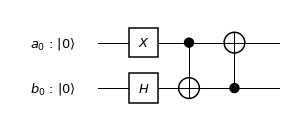

In [5]:
qc.draw(output='mpl')
# this is a maximally entangled system in a singlet state

[[ 0.   +0.j  0.707+0.j  0.   +0.j  0.707+0.j]
 [ 0.707+0.j  0.   +0.j -0.707+0.j  0.   +0.j]
 [ 0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j -0.707+0.j]]


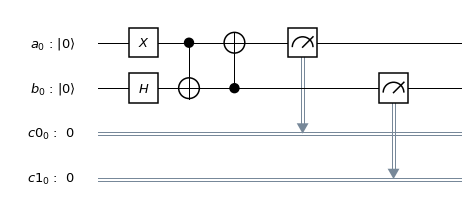

In [6]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))
c0 = ClassicalRegister(1, 'c0')
c1 = ClassicalRegister(1, 'c1')
meas = QuantumCircuit(a,b,c0,c1)
meas.draw(output='mpl')
meas.measure(a,c0)
meas.measure(b,c1)
circ = qc+meas
circ.draw(output='mpl')

In [7]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
# there are always only two solutions: 10 and 01

{'0 1': 531, '1 0': 493}


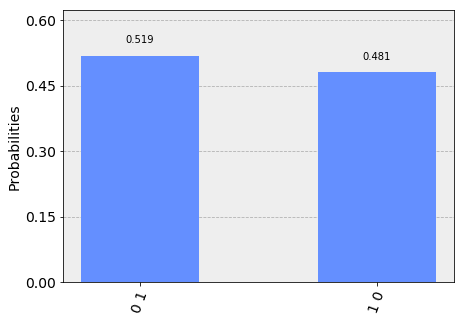

In [8]:
plot_histogram(counts)